In [1]:
from CFRalgorithm import TempleCFR

if __name__ == "__main__":
	k = TempleCFR(100_000, {})
	utilities = k.cfr_iterations_external()

100%|██████████| 100000/100000 [1:11:52<00:00, 23.19it/s]   

Average game value 0: 12944.615835328903
Average game value 1: -1316.2184547994395
Average game value 2: 1368.4480606853383


In [2]:
len(k.nodes) 

15202

In [3]:
for node in k.nodes:
    print(node)
    print("regret_sum",k.nodes[node].regret_sum)
    print("strategy",k.nodes[node].get_strategy())
    print("strategy sum",k.nodes[node].strategy_sum)    
    print("average strategy",k.nodes[node].get_average_strategy())

P:0,C:[3, 2]->(P:1
regret_sum [0. 0.]
strategy [0.5 0.5]
strategy sum [0. 0.]
average strategy [0.5 0.5]
P:0,C:[3, 2]->(P:1,A:[1, 0])->(P:0
regret_sum [   35.17469383 -7069.0136403 ]
strategy [1. 0.]
strategy sum [4491676.92430054   32323.07569946]
average strategy [0.9928552 0.0071448]
P:0,C:[3, 2]->(P:1,A:[1, 0])->(P:0,A:[1, 0])->(P:2
regret_sum [0. 0.]
strategy [0.5 0.5]
strategy sum [0. 0.]
average strategy [0.5 0.5]
P:0,C:[3, 2]->(P:1,A:[1, 0])->(P:0,A:[1, 0])->(P:2,A:[0, 1])->(P:1
regret_sum [0. 0.]
strategy [0.5 0.5]
strategy sum [0. 0.]
average strategy [0.5 0.5]
P:0,C:[3, 2]->(P:1,A:[1, 0])->(P:0,A:[1, 0])->(P:2,A:[0, 1])->(P:1,A:2)->(P:2
regret_sum [0. 0.]
strategy [0.5 0.5]
strategy sum [0. 0.]
average strategy [0.5 0.5]
P:0,C:[3, 2]->(P:1,A:[1, 0])->(P:0,A:[1, 0])->(P:2,A:[0, 1])->(P:1,A:2)->(P:2,A:1)->(P:1
regret_sum [0. 0.]
strategy [0.5 0.5]
strategy sum [0. 0.]
average strategy [0.5 0.5]
P:0,C:[3, 2]->(P:1,A:[1, 0])->(P:0,A:[1, 0])->(P:2,A:[0, 1])->(P:1,A:2)->(P:2,A:1)-

In [13]:
import json

with open('cfr_strategies.json', 'w') as f:
    dump = {node: tuple(k.nodes[node].get_strategy()) for node in k.nodes}
    json.dump(dump, f)
    

In [14]:
import json

## open JSON file
with open('cfr_strategies.json') as f:
    data = json.load(f)

data = {node.replace("[1, 0]", "Fire"): data[node] for node in data.keys()}
data = {node.replace("[0, 1]", "NoFire"): data[node] for node in data.keys()}
data = {node.replace("3", "Gold"): data[node] for node in data.keys()}
data = {node.replace("2]", "Fire]"): data[node] for node in data.keys()}
data = {node.replace("[2", "[Fire"): data[node] for node in data.keys()}
## open JSON file
with open('cfr_strategies_decoded.json', 'w') as f:
    json.dump(data, f)

In [16]:
with open('cfr_strategies_decoded.json') as f:
    data = json.load(f)
data

{'P:0,C:[Gold, Fire]->(P:1': [0.5, 0.5],
 'P:0,C:[Gold, Fire]->(P:1,A:Fire)->(P:0': [1.0, 0.0],
 'P:0,C:[Gold, Fire]->(P:1,A:Fire)->(P:0,A:Fire)->(P:2': [0.5, 0.5],
 'P:0,C:[Gold, Fire]->(P:1,A:Fire)->(P:0,A:Fire)->(P:2,A:NoFire)->(P:1': [0.5,
  0.5],
 'P:0,C:[Gold, Fire]->(P:1,A:Fire)->(P:0,A:Fire)->(P:2,A:NoFire)->(P:1,A:2)->(P:2': [0.5,
  0.5],
 'P:0,C:[Gold, Fire]->(P:1,A:Fire)->(P:0,A:Fire)->(P:2,A:NoFire)->(P:1,A:2)->(P:2,A:1)->(P:1': [0.5,
  0.5],
 'P:0,C:[Gold, Fire]->(P:1,A:Fire)->(P:0,A:Fire)->(P:2,A:NoFire)->(P:1,A:2)->(P:2,A:1)->(P:1,A:0)->(P:0': [0.0,
  1.0],
 'P:0,C:[Gold, Fire]->(P:1,A:Fire)->(P:0,A:Fire)->(P:2,A:NoFire)->(P:1,A:2)->(P:2,A:1)->(P:1,A:0)->(P:0,A:1)->(P:1': [0.5,
  0.5],
 'P:0,C:[Gold, Fire]->(P:1,A:Fire)->(P:0,A:Fire)->(P:2,A:NoFire)->(P:1,A:2)->(P:2,A:1)->(P:1,A:0)->(P:0,A:2)->(P:2': [0.5,
  0.5],
 'P:0,C:[Gold, Fire]->(P:1,A:Fire)->(P:0,A:Fire)->(P:2,A:NoFire)->(P:1,A:2)->(P:2,A:1)->(P:1,A:0)->(P:0,A:2)->(P:2,A:0)->(P:0': [0.5,
  0.5],
 'P:0,C:[Gold, Fi

<Axes: >

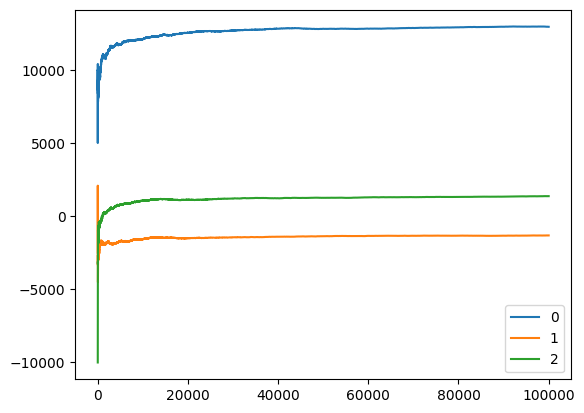

In [17]:
import pandas as pd
pd.DataFrame(utilities).plot()